### Training a Model

In [67]:
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import json

# ler o ficheiro .txt
with open('Harry_Potter_e_A_Pedra_Filosofal.txt', 'r', encoding='utf-8') as f:
    texto = f.read()

# dividir o texto em frases
frases = sent_tokenize(texto, language='portuguese')

# tokenizar cada frase em palavras e filtrar apenas palavras alfabéticas
sentences = [
    [token.lower() for token in word_tokenize(frase, language='portuguese') if token.isalpha()]
    for frase in frases
]

# guardar o resultado num ficheiro (por exemplo, JSON para ser mais fácil de ler)
with open('tokenized_output.json', 'w', encoding='utf-8') as f_out:
    json.dump(sentences, f_out, ensure_ascii=False, indent=4)


In [68]:
from gensim.models import Word2Vec
import os

# define training data
model = Word2Vec(sentences, vector_size=500, window=5, min_count=5, sg=1, epochs=10, workers= os.cpu_count()  # usar todos os cores disponíveis
)

At its core, word2vec model parameters are stored as matrices (NumPy arrays). Each array is `#vocabulary` (controlled by the min_count parameter) times vector size (the vector_size parameter) of floats (single precision aka 4 bytes).

Three such matrices are held in RAM (work is underway to reduce that number to two, or even one). So if your input contains 100,000 unique words, and you asked for layer vector_size=200, the model will require approx. `100,000 * 200 * 4 * 3 bytes = ~229MB`.

(There’s a little extra memory needed for storing the vocabulary tree.)

In [69]:
model.wv['harry']

array([-2.80944668e-02,  1.53910145e-01,  9.13369879e-02,  5.52382506e-02,
       -1.06398843e-01, -1.01702914e-01,  5.88414669e-02,  4.23665754e-02,
        4.38993014e-02, -5.69652133e-02,  2.21599843e-02,  7.13015150e-04,
        3.76853459e-02,  7.53160864e-02, -3.36011499e-02, -1.10354237e-01,
       -1.06138542e-01, -6.72231317e-02, -7.18647894e-03, -9.57783237e-02,
        3.32949460e-02, -4.39376906e-02, -2.38832906e-02,  7.99465086e-03,
       -9.95465145e-02,  1.58229899e-02, -2.46866960e-02, -7.49824103e-04,
       -7.48031214e-02, -5.09439856e-02,  5.53655009e-05, -6.54068068e-02,
       -6.10070070e-03,  5.97537421e-02,  8.81278589e-02,  7.54428878e-02,
        1.45378441e-01, -2.93865260e-02, -1.51914522e-01, -2.16650385e-02,
       -1.84655134e-02, -2.70660445e-02, -1.64334595e-01, -1.22595597e-02,
       -1.48305282e-01, -1.72562078e-01,  2.23292168e-02,  2.62500755e-02,
        1.45378476e-02,  1.83537230e-02,  3.30784172e-02, -5.18697873e-02,
       -1.90660041e-02, -

In [70]:
model.wv['hermione']

array([ 1.16904257e-02,  1.71996891e-01,  8.96524638e-02,  2.56533921e-02,
       -1.15709417e-01, -6.93985224e-02,  3.92569229e-02,  8.09880123e-02,
        1.05457738e-01, -4.02604006e-02,  4.36695553e-02, -2.87845153e-02,
        1.03193827e-01,  8.54877830e-02, -3.17322165e-02, -1.41504660e-01,
       -1.86299399e-01, -6.11178912e-02, -5.31199425e-02, -4.64046448e-02,
        3.06739062e-02, -5.77335432e-02,  2.14431755e-04,  3.90885174e-02,
       -1.06552936e-01,  4.90300544e-03,  2.49105711e-02, -4.90630567e-02,
       -1.01334363e-01, -3.98899317e-02,  3.06242555e-02, -1.91585068e-02,
       -1.08468728e-02,  1.20019399e-01,  1.52574539e-01,  1.19587079e-01,
        1.47734806e-01, -5.76808490e-02, -1.12480894e-01, -4.47398350e-02,
       -2.18603984e-02, -6.65439814e-02, -2.89754033e-01, -2.05462761e-02,
       -1.44305184e-01, -1.54510558e-01,  1.05058895e-02, -1.66511554e-02,
       -3.36768776e-02,  6.71716481e-02,  7.72728175e-02, -7.04792067e-02,
       -2.64893584e-02, -

In [71]:
def get_word(word):
    try:
        return model.wv[word]
    except KeyError:
        print("The word '"+word+"' does not appear in this model")

In [72]:
get_word("advanced")

The word 'advanced' does not appear in this model


### Online training / Resuming training

In [73]:
more_sentences = [
    ['Advanced', 'users', 'can', 'load', 'a', 'model',
     'and', 'continue', 'training', 'it', 'with', 'more', 'sentences',"ds"],
]

model.build_vocab(more_sentences, update=True)
model.train(more_sentences, total_examples=model.corpus_count, epochs=model.epochs)
get_word("Advanced")


The word 'Advanced' does not appear in this model


### Vocabulary Length

In [74]:
len(model.wv)

1802

In [75]:
model.wv.index_to_key

['de',
 'que',
 'a',
 'e',
 'o',
 'não',
 'harry',
 'para',
 'um',
 'se',
 'uma',
 'com',
 'os',
 'em',
 'do',
 'ele',
 'é',
 'no',
 'da',
 'mas',
 'você',
 'na',
 'disse',
 'por',
 'as',
 'rony',
 'estava',
 'mais',
 'hagrid',
 'como',
 'era',
 'quando',
 'muito',
 'hermione',
 'ao',
 'à',
 'eu',
 'coisa',
 'eles',
 'está',
 'foi',
 'dos',
 'sua',
 'me',
 'seu',
 'ela',
 'tinha',
 'bem',
 'snape',
 'isso',
 'dumbledore',
 'das',
 'ter',
 'vai',
 'vez',
 'duda',
 'então',
 'agora',
 'cabeça',
 'até',
 'já',
 'olhos',
 'vocês',
 'nada',
 'havia',
 'só',
 'parecia',
 'todos',
 'alguma',
 'sem',
 'perguntou',
 'porta',
 'ser',
 'neville',
 'tio',
 'nem',
 'lhe',
 'válter',
 'tão',
 'quirrell',
 'pelo',
 'fazer',
 'nunca',
 'dizer',
 'dois',
 'potter',
 'porque',
 'mesmo',
 'nos',
 'dursley',
 'depois',
 'vamos',
 'pela',
 'grifinória',
 'tem',
 'estavam',
 'aqui',
 'lado',
 'grande',
 'fora',
 'tinham',
 'tempo',
 'dele',
 'casa',
 'quem',
 'lá',
 'quase',
 'seus',
 'enquanto',
 'ou',
 'a

### Saving and Loading 

In [76]:
model.save("models/word2vec.model")

model = Word2Vec.load("models/word2vec.model")


In [77]:
# Store just the words + their trained embeddings.

from gensim.models import KeyedVectors

word_vectors = model.wv
word_vectors.save("models/word2vec.wordvectors")

wv = KeyedVectors.load("models/word2vec.wordvectors")
vector = wv['harry'] 
print(vector)




[-2.80944668e-02  1.53910145e-01  9.13369879e-02  5.52382506e-02
 -1.06398843e-01 -1.01702914e-01  5.88414669e-02  4.23665754e-02
  4.38993014e-02 -5.69652133e-02  2.21599843e-02  7.13015150e-04
  3.76853459e-02  7.53160864e-02 -3.36011499e-02 -1.10354237e-01
 -1.06138542e-01 -6.72231317e-02 -7.18647894e-03 -9.57783237e-02
  3.32949460e-02 -4.39376906e-02 -2.38832906e-02  7.99465086e-03
 -9.95465145e-02  1.58229899e-02 -2.46866960e-02 -7.49824103e-04
 -7.48031214e-02 -5.09439856e-02  5.53655009e-05 -6.54068068e-02
 -6.10070070e-03  5.97537421e-02  8.81278589e-02  7.54428878e-02
  1.45378441e-01 -2.93865260e-02 -1.51914522e-01 -2.16650385e-02
 -1.84655134e-02 -2.70660445e-02 -1.64334595e-01 -1.22595597e-02
 -1.48305282e-01 -1.72562078e-01  2.23292168e-02  2.62500755e-02
  1.45378476e-02  1.83537230e-02  3.30784172e-02 -5.18697873e-02
 -1.90660041e-02 -7.65684098e-02  6.20060414e-02 -1.30801424e-01
  1.26623055e-02 -1.18107639e-01 -1.26702249e-01  1.04971454e-01
  5.79341687e-02 -8.64128

By default, it uses pickle internally, optionally mmap‘ing the model’s internal large NumPy matrices into virtual memory directly from disk files, for inter-process memory sharing.

In addition, you can load models created by the original C tool, both using its text and binary formats:

In [78]:
word_vectors.save_word2vec_format('models/vectors.txt', binary=False)
word_vectors.save_word2vec_format('models/vectors.bin', binary=True)

In [79]:
model_txt = KeyedVectors.load_word2vec_format('models/vectors.txt', binary=False)
model_bin = KeyedVectors.load_word2vec_format('models/vectors.bin', binary=True)

### Available Models

In [80]:
import gensim.downloader
# Show all available models in gensim-data
list(gensim.downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

In [81]:
# Load the model
model_wv = Word2Vec.load("models/word2vec.model") #desta forma para ver os most similars 
#em vez de colocarmos model_wv.most_similar('conceito') tem de ser model_wv.wv.most_similar('conceito')
#model_wv = KeyedVectors.load("models/word2vec.wordvectors") #normal model_wv.most_similar('conceito')


In [82]:
model.wv.save_word2vec_format('model_harry.txt', binary=False)

### Similarity

In [83]:
model_wv.wv.most_similar('harry')

[('hagrid', 0.9191163778305054),
 ('rony', 0.9184866547584534),
 ('neville', 0.9153537154197693),
 ('finalmente', 0.9021344184875488),
 ('hermione', 0.8950336575508118),
 ('ansioso', 0.8771286606788635),
 ('força', 0.8690714836120605),
 ('exclamou', 0.8686359524726868),
 ('boca', 0.8635919690132141),
 ('percy', 0.8634083271026611)]

In [84]:
model_wv.wv.most_similar('snape')

[('filosofal', 0.9277344346046448),
 ('malfoy', 0.9248496890068054),
 ('quirrell', 0.9233964085578918),
 ('manter', 0.914941132068634),
 ('professor', 0.9146862626075745),
 ('comer', 0.9127126932144165),
 ('invisível', 0.9104861617088318),
 ('estivesse', 0.9098584055900574),
 ('acontecendo', 0.9096461534500122),
 ('fizesse', 0.9092376828193665)]

In [85]:
print(model_wv.wv.similarity("harry","draco"))
print(model_wv.wv.similarity("harry","malfoy"))
print(model_wv.wv.similarity("harry","trouxa")) #trouxa são os muggles em portugues-br
print(model_wv.wv.similarity("hermione","trouxa"))

print(model_wv.wv.similarity("harry","voldemort"))
print(model_wv.wv.similarity("hermione","voldemort"))


0.8462477
0.8155564
0.69209474
0.66466767
0.50103956
0.5240729


In [86]:
pairs = [
    ('harry', 'grifinória'),   # a minivan is a kind of car
    ('hermione', 'grifinória'),   # still a wheeled vehicle
    ('rony', 'grifinória'),  # ok, no wheels, but still a vehicle
]
for w1, w2 in pairs:
    print('%s \t %s \t% .2f' % (w1, w2, model_wv.wv.similarity(w1, w2)))

harry 	 grifinória 	 0.33
hermione 	 grifinória 	 0.35
rony 	 grifinória 	 0.27


### Intruso - Which one is the odd one out in this list?

In [87]:
model_wv.wv.doesnt_match(["harry","snape","grifinória"])
#griffindor é o único que não é uma pessoa

'grifinória'

In [88]:
model_wv.wv.doesnt_match(["harry", "trouxa", "bruxo"])
#Harry é uma pessoa e não um estado de se consegue usar ou não magia

'harry'

In [135]:
model_wv.wv.doesnt_match(["varinha","pedra","bruxo"])
#bruxo é o único que não é um objeto

'bruxo'

### Analogies

<img src="analogia.png">

In [90]:
result = model_wv.wv.most_similar(positive=['harry', 'bruxo'], negative=['luz'])
print(result[0])

('dumbledore', 0.8631475567817688)


In [114]:
result = model_wv.wv.most_similar(positive=['harry', 'família'], negative=['feliz'])
print(result[0])

('boca', 0.8342172503471375)


In [102]:
model_wv.wv.most_similar("harry", topn=50)

[('hagrid', 0.9191163778305054),
 ('rony', 0.9184866547584534),
 ('neville', 0.9153537154197693),
 ('finalmente', 0.9021344184875488),
 ('hermione', 0.8950336575508118),
 ('ansioso', 0.8771286606788635),
 ('força', 0.8690714836120605),
 ('exclamou', 0.8686359524726868),
 ('boca', 0.8635919690132141),
 ('percy', 0.8634083271026611),
 ('cara', 0.8631575107574463),
 ('granger', 0.8593661785125732),
 ('olhando', 0.8590523600578308),
 ('ela', 0.8570812940597534),
 ('ficou', 0.856887698173523),
 ('simas', 0.8552364110946655),
 ('rispidez', 0.854263186454773),
 ('gigante', 0.8526923060417175),
 ('parecendo', 0.8507075309753418),
 ('virou', 0.8488553762435913),
 ('esganiçada', 0.8476555347442627),
 ('voz', 0.846248984336853),
 ('draco', 0.8462475538253784),
 ('perguntou', 0.8401044607162476),
 ('deixou', 0.8397403955459595),
 ('braço', 0.83669513463974),
 ('sorrindo', 0.8352171182632446),
 ('sentar', 0.8352000117301941),
 ('continuava', 0.8332949876785278),
 ('imediatamente', 0.832967340946197

In [108]:
def analogy( x2, y1, x1):
    result = model_wv.wv.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [133]:
analogy('harry', 'hermione', 'trouxa')
#Resultado faz sentido, pois é o "amigo" mais próximo do Harry e da Hermione, e que não é "trouxa"

'rony'

In [136]:
analogy('bruxo', 'menina', 'menino')
#Resultado suposto seria "Hermione", mas não foi obtido o pretendido.

'forma'

### Visualisation

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def display_pca_scatterplot(model, words=None):
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

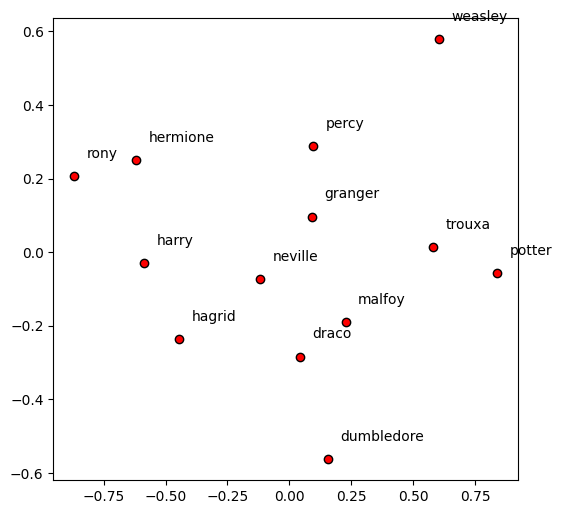

In [127]:
words2 =  ['harry', 'rony', 'hermione', 'hagrid', 'neville', 'potter',
                         'granger', 'weasley', 'percy', 'malfoy', 'draco', 'trouxa',
                         'dumbledore']
display_pca_scatterplot(model_wv.wv,words2)

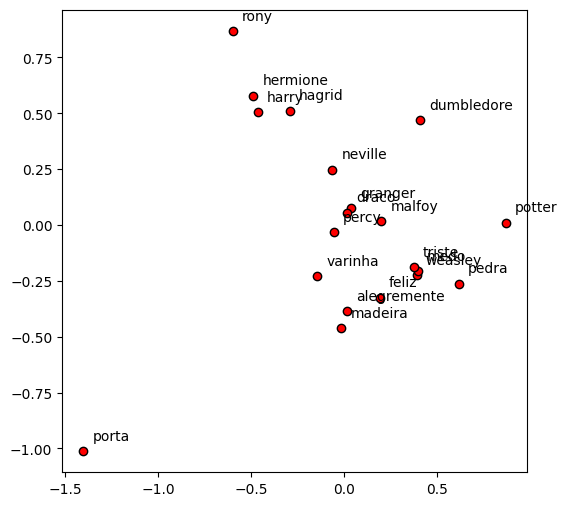

In [129]:
words =  ['harry', 'rony', 'hermione', 'hagrid', 'neville', 'potter',
                         'granger', 'weasley', 'percy', 'malfoy', 'draco', 'dumbledore',
          'varinha', 'pedra', 'madeira', 'porta',
          'medo', 'triste', 'feliz', 'alegremente']
display_pca_scatterplot(model_wv.wv,words)

In [130]:
from sklearn.manifold import TSNE
def display_closestwords_tsnescatterplot(model, words):
    
    arr = np.empty((0,300), dtype='f')

    # get close words
    
    for word in words:
        wrd_vector = model[word]
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, perplexity=10,n_iter=5000)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(words, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()
